In [78]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

master_filename = './Baseball Data/core/Master.csv'
master_df = pd.read_csv(master_filename)

batting_filename = './Baseball Data/core/Batting.csv'
batting_df = pd.read_csv(batting_filename)

pitching_filename = './Baseball Data/core/Pitching.csv'
pitching_df = pd.read_csv(pitching_filename)

fielding_filename = './Baseball Data/core/Fielding.csv'
fielding_df = pd.read_csv(fielding_filename)

salaries_filename = './Baseball Data/core/Salaries.csv'
salaries_df = pd.read_csv(salaries_filename)

awards_filename = './Baseball Data/core/AwardsPlayers.csv'
awards_df = pd.read_csv(awards_filename)

schools_filename = './Baseball Data/core/Schools.csv'
schools_df = pd.read_csv(schools_filename)

college_filename ='./Baseball Data/core/CollegePlaying.csv'
college_players_df = pd.read_csv(college_filename)

appearances_filename = './Baseball Data/core/Appearances.csv'
appearance_df = pd.read_csv(appearances_filename)

appearance_df.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,NaN,1,1,0,0,...,0,0,1,0,0,0,0,NaN,NaN,NaN
1,1871,RC1,NaN,addybo01,25,NaN,25,25,0,0,...,22,0,3,0,0,0,0,NaN,NaN,NaN
2,1871,CL1,NaN,allisar01,29,NaN,29,29,0,0,...,2,0,0,0,29,0,29,NaN,NaN,NaN
3,1871,WS3,NaN,allisdo01,27,NaN,27,27,0,27,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1871,RC1,NaN,ansonca01,25,NaN,25,25,0,5,...,2,20,0,1,0,0,1,NaN,NaN,NaN


In [52]:
homeruns = batting_df['HR']
runs = batting_df['R']
hits = batting_df['H']
strike_outs = batting_df['SO']
player_salaries = salaries_df['salary']

merged_df = batting_df.merge(salaries_df, on = ['playerID','yearID'], how = 'inner')

top_salary_batting_df = merged_df.sort_values('salary', ascending = False).head(1000)
low_salary_batting_df = merged_df.sort_values('salary', ascending = False).tail(1000)

In [53]:
def correlation(x, y):
    std_x = x.std(ddof = 0)
    std_y = y.std(ddof = 0)
    mean_x = x.mean()
    mean_y = y.mean()

    norm_x = (x - mean_x)/std_x
    norm_y = (y - mean_y)/std_y
    
    correlation = (norm_x * norm_y).mean()
    
    return correlation

Populating the interactive namespace from numpy and matplotlib


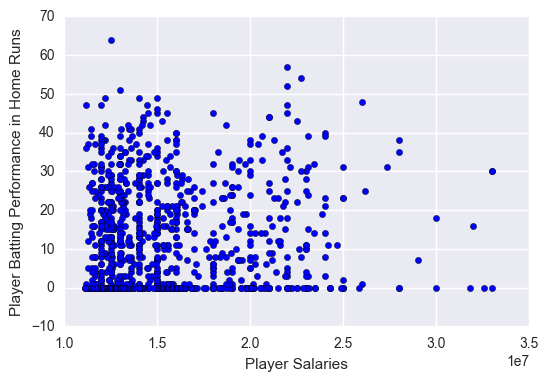

In [91]:

%pylab inline
plt.scatter(top_salary_batting_df['salary'],top_salary_batting_df['HR'])
plt.xlabel("Player Salaries")
plt.ylabel("Player Batting Performance in Home Runs")

Populating the interactive namespace from numpy and matplotlib


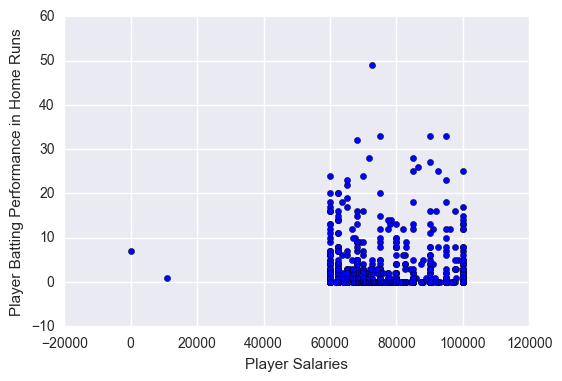

In [92]:
%pylab inline
plt.scatter(low_salary_batting_df['salary'],low_salary_batting_df['HR'])
plt.xlabel("Player Salaries")
plt.ylabel("Player Batting Performance in Home Runs")



In [93]:
print(low_salary_batting_df['HR'].mean())
print(top_salary_batting_df['HR'].mean())
print(correlation(merged_df['salary'],merged_df['HR']))

2.362
12.35
0.276330515882


The  Above Two Scatter Plots and the correlation function show a weak positive correlation between Player Salaries and Home Runs hit by each player. The average homeruns for Players with higher salaries is significantly higher than the average for low salary players. 

In [89]:
merged_appearance_salary_df = appearance_df.merge(salaries_df, on = ['playerID', 'yearID'], how = 'inner')

merged_appearance_salary_df.sort_values('salary', ascending = False).head(100)[['GS','G_batting','G_defense','G_p','G_c','G_ph','G_dh','salary']]

,GS,G_batting,G_defense,G_p,G_c,G_ph,G_dh,salary
27802,21.0,21,21,21,0,1.0,0.0,33000000
21834,122.0,124,116,0,0,2.0,9.0,33000000
22703,134.0,137,124,0,0,3.0,12.0,33000000
26911,33.0,31,33,33,0,1.0,0.0,32571000
23591,97.0,99,89,0,0,1.0,10.0,32000000
27700,26.0,25,26,26,0,1.0,0.0,31799030
28013,35.0,4,35,35,0,0.0,0.0,30000000
24485,119.0,122,81,0,0,3.0,38.0,30000000
25393,43.0,44,27,0,0,1.0,16.0,29000000
27330,20.0,0,20,20,0,0.0,0.0,28000000


In [99]:
merged_appearance_salary_df.sort_values('salary', ascending = False).tail(100)[['GS','G_batting','G_defense','G_p','G_c','G_ph','G_dh','salary']]

,GS,G_batting,G_defense,G_p,G_c,G_ph,G_dh,salary
977,0.0,0,33,33,0,0.0,0.0,60000
536,43.0,73,70,0,70,4.0,0.0,60000
1060,0.0,0,6,6,0,0.0,0.0,60000
651,25.0,27,25,0,0,2.0,0.0,60000
591,0.0,10,10,10,0,0.0,0.0,60000
1058,0.0,34,34,34,0,0.0,0.0,60000
596,0.0,61,61,61,0,0.0,0.0,60000
1081,0.0,37,37,37,0,0.0,0.0,60000
1047,23.0,39,31,0,0,11.0,0.0,60000
992,16.0,16,16,16,0,0.0,0.0,60000


The Above Two tables show that higher salaried players are more likely to start every match  in both defense and batting

In [94]:
merged_pitching_df = pitching_df.merge(salaries_df, on = ['playerID','yearID'], how = 'inner')

In [95]:
top_salary_pitching_df = merged_df.sort_values('salary', ascending = False).head(1000)
low_salary_pitching_df = merged_df.sort_values('salary', ascending = False).tail(1000)

Populating the interactive namespace from numpy and matplotlib


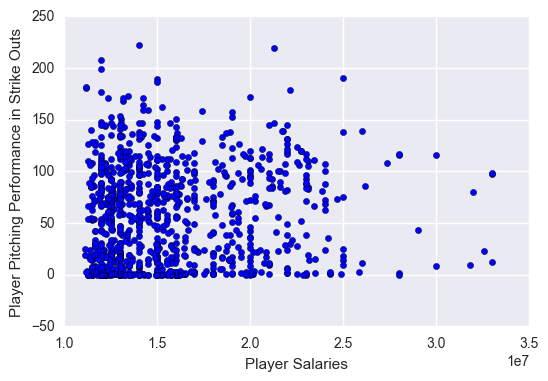

In [96]:
%pylab inline
plt.scatter(top_salary_pitching_df['salary'],top_salary_pitching_df['SO'])
plt.xlabel("Player Salaries")
plt.ylabel("Player Pitching Performance in Strike Outs")

Populating the interactive namespace from numpy and matplotlib


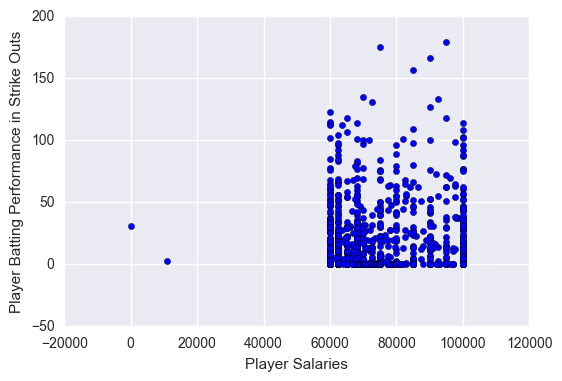

In [97]:
%pylab inline
plt.scatter(low_salary_pitching_df['salary'],low_salary_pitching_df['SO'])
plt.xlabel("Player Salaries")
plt.ylabel("Player Batting Performance in Strike Outs")

In [98]:
print(low_salary_pitching_df['SO'].mean())
print(top_salary_pitching_df['SO'].mean())
print(correlation(merged_pitching_df['salary'],merged_pitching_df['SO']))

19.955
56.457
0.310045969118
